<a href="https://colab.research.google.com/github/hodades/California_housing_price.ipynb/blob/main/California_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à la Régression avec Scikit-Learn

### Introduction

Dans cette séance, nous allons explorer la **régression**, une tâche centrale en Machine Learning supervisé qui consiste à prédire une valeur continue (par exemple, le prix d’une maison ou le revenu annuel d’un individu) en fonction de caractéristiques observables. La régression est utilisée dans de nombreux domaines comme la finance, l'immobilier et les prévisions météorologiques, car elle permet de prédire une valeur numérique en fonction d'autres variables.

Pour illustrer les concepts clés de la régression, nous utiliserons le **California Housing Dataset** de `scikit-learn`. Ce dataset contient des informations sur des logements en Californie, comme leur taille, leur emplacement, ou leur proximité de services publics, et servira à prédire la valeur médiane des logements dans une région donnée.

### Objectifs de la Séance

- Comprendre les concepts théoriques de la régression en apprentissage supervisé.
- Suivre un workflow de Machine Learning pour entraîner un modèle de régression.
- Appliquer ces concepts en utilisant des modèles de régression sur un dataset réel.
- Évaluer la performance du modèle et interpréter ses résultats.

À la fin de cette séance, vous aurez acquis une compréhension des étapes nécessaires pour développer un modèle de régression en Machine Learning, depuis le prétraitement des données jusqu’à l’évaluation de ses performances.

---
## Rappel : L'Apprentissage Supervisé


L’**apprentissage supervisé** est une méthode où un modèle est entraîné sur des données étiquetées, c'est-à-dire pour lesquelles les résultats attendus sont déjà connus. Le modèle apprend ainsi les relations entre les caractéristiques (features) et la cible (target), de façon à pouvoir prédire cette cible pour de nouvelles données.

### Types de Tâches Supervisées

- **Classification** : Prédire une **catégorie** ou **classe** (ex. prédire l'espèce d'une fleur).
- **Régression** : Prédire une **valeur continue** (ex. estimer le revenu annuel d'un individu).

### Composantes de l’Apprentissage Supervisé

Les principales composantes d'un dataset en apprentissage supervisé sont :
- **Features (Caractéristiques)** : Variables descriptives qui permettent de prédire la cible.
- **Target (Cible)** : Variable que le modèle cherche à prédire.
- **Training Data (Données d’Entraînement)** : Sous-ensemble utilisé pour entraîner le modèle.
- **Test Data (Données de Test)** : Sous-ensemble utilisé pour évaluer le modèle et mesurer sa capacité de généralisation.


## **Workflow Général en Apprentissage Supervisé**

Le workflow d'un projet de Machine Learning supervisé comporte plusieurs étapes. Voici une représentation visuelle du processus :


```markdown

   ┌───────────────┐      ┌───────────────┐      ┌───────────────┐       ┌───────────────┐
   │   Dataset     │ ---> │   Exploration │ ---> │ Preprocessing │ --->  │   Splitting   │
   └───────────────┘      └───────────────┘      └───────────────┘       └───────────────┘  
                                                                               │                       
                                                                  └─────────────────────────────┘
                                                                      │                   │
                                                                      ▼                   ▼
                                                            ┌───────────────┐         ┌───────────────┐
                                                            │ Training Data │         │   Test Data   │
                                                            └───────────────┘         └───────────────┘
                                                                   └─────────────────────────────┘
                                                                       │                   │
                                                                       ▼                   ▼
                                                           ┌────────────────┐          ┌──────────────────┐
                                                           │ Model Training │          │ Model Evaluation │
                                                           │  (sur Train)   │          │    (sur Test)    │
                                                           └────────────────┘          └──────────────────┘





```



## Rappel : Syntaxe Générale en Python avec Scikit-Learn

Pour implémenter un modèle d'apprentissage supervise de classification ou de regression en Python avec `scikit-learn`, nous suivrons les étapes suivantes :


```python
# 1. Importer le modèle
from sklearn.model import ModelClass  # Ex : LinearRegression, Ridge, Lasso

# 2. Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instancier et entraîner le modèle
model = ModelClass()
model.fit(X_train, y_train)

# 4. Prédire les résultats
y_pred = model.predict(X_test)

# 5. Évaluer le modèle avec des métriques de régression
from sklearn import metrics
score = metrics.mean_squared_error(y_test, y_pred)  # Exemple de métrique de régression
```

#### Explication des Étapes

1. **Importer le modèle** :
   - Importez la classe de modèle de régression depuis `scikit-learn` (par exemple, `LinearRegression`, `Ridge` ou `Lasso`).

2. **Diviser les données (`train_test_split`)** :
   - **Pourquoi diviser ?** Cela permet de tester la capacité du modèle à généraliser sur des données nouvelles. Habituellement, on utilise 80 % des données pour l’entraînement et 20 % pour le test.
   - **Paramètres importants** :
     - `test_size=0.2` : Affecte 20 % des données à l’ensemble de test et 80 % à l’entraînement.
     - `random_state=42` : Assure que la division est reproductible. Fixer `random_state` permet d’obtenir la même division à chaque exécution.

3. **Instancier et entraîner le modèle (`.fit()`)** :
   - **Instanciation** : `model = ModelClass()` crée le modèle avec les paramètres par défaut ou en spécifiant des paramètres spécifiques.
   - **Entraînement** : `model.fit(X_train, y_train)` permet au modèle d’apprendre les relations dans les données d’entraînement.

4. **Prédire les résultats (`.predict()`)** :
   - `model.predict(X_test)` génère les prédictions `y_pred` pour l’ensemble de test `X_test`, permettant de les comparer aux valeurs réelles `y_test`.

5. **Évaluer le modèle (métriques de `metrics`)** :
   - `metrics` propose des fonctions pour évaluer les performances du modèle. En régression, on utilise souvent des métriques telles que :
     - `mean_squared_error` (erreur quadratique moyenne)
     - `mean_absolute_error` (erreur absolue moyenne)
     - `r2_score` (coefficient de détermination R²)

---

## Introduction à la Régression


La **régression** est une technique d'apprentissage supervisé en Machine Learning utilisée pour prédire une valeur continue, comme un prix, une température, ou une durée, en fonction de caractéristiques observables. Contrairement à la classification, où la cible est une catégorie, la régression vise à établir une relation entre des caractéristiques et une cible numérique.

<img src="regression.png" alt="regression.png" width="400" height="300">

### Exemple d’Applications Courantes de la Régression

1. **Immobilier** : Prédire le prix d'une maison en fonction de sa surface, de sa localisation, et du nombre de chambres.
2. **Prévisions météorologiques** : Estimer la température ou les précipitations pour les jours à venir.
3. **Analyse des ventes** : Prédire les ventes d'un produit en fonction des dépenses en publicité et des caractéristiques démographiques.


### Exemple de Régression

Imaginons un modèle de régression destiné à prédire la **consommation de carburant** d'une voiture (en L/100 km) en fonction de caractéristiques telles que la cylindrée, la puissance et le poids. Le modèle va analyser ces caractéristiques pour apprendre à estimer la consommation d’une nouvelle voiture.

**Exemple de Dataset :**

| Cylindrée (L) | Puissance (HP) | Poids (kg) | Consommation (L/100 km) |
|---------------|----------------|------------|--------------------------|
| 1.8           | 130            | 1200       | 7.5                      |
| 2.0           | 150            | 1400       | 8.5                      |
| 2.2           | 170            | 1600       | 9.5                      |
| 1.6           | 110            | 1000       | 6.8                      |

Dans cet exemple simplifié, le modèle apprend que des caractéristiques comme une cylindrée plus importante ou un poids plus élevé tendent à être associées à une consommation de carburant plus élevée. Il peut ainsi utiliser ces relations pour estimer la consommation d’une nouvelle voiture en fonction de ses caractéristiques techniques.

---
## Introduction au California Housing Dataset

Le **California Housing Dataset** est un jeu de données classique en Machine Learning utilisé pour des tâches de régression. Il contient des informations socio-économiques et géographiques de districts en Californie, collectées lors du recensement de 1990.

### Objectif

L'objectif est de **prédire la valeur médiane des logements** dans chaque district en fonction de diverses caractéristiques comme le revenu médian, l'âge médian des maisons, la population, la densité de logements, ainsi que la localisation géographique.

### Caractéristiques Principales

Les caractéristiques disponibles incluent :
- **Revenu médian des ménages**
- **Âge médian des maisons**
- **Nombre moyen de pièces et de chambres par logement**
- **Population totale du district**
- **Latitude et longitude** géographiques

Cette base de données nous permet d'explorer les facteurs influençant les valeurs immobilières et de construire un modèle capable d'estimer les prix de l'immobilier en fonction de données démographiques et environnementales.

---
## Étape 1 : Chargement et Transformation du California Housing Dataset

**Objectif** : Charger le dataset California Housing disponible dans `scikit-learn` et le transformer en un DataFrame `pandas` pour faciliter la manipulation et l'exploration.

#### Instructions

1. **Charger le Dataset**  
   - Le dataset California Housing est inclus dans `scikit-learn`. Utilisez la fonction `fetch_california_housing()` pour charger les données.

In [1]:
# Insérez votre code ici pour charger le California Housing Dataset
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing()

# Convert to a DataFrame
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

2. **Transformer en DataFrame**  
   - Une fois le dataset chargé, transformez les données en un DataFrame `pandas`.
   - Assurez-vous que les colonnes du DataFrame utilisent les noms de caractéristiques disponibles dans le dataset.

In [2]:
# Insérez votre code ici pour transformer les données en DataFrame
# Ajouter la colonne cible (MedHouseVal)
housing_df['MedHouseVal'] = housing.target

# Afficher les premières lignes du DataFrame
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


---
## Étape 2 : Exploration des Données (EDA)

**Objectif** : Mener une exploration initiale du California Housing Dataset pour comprendre sa structure, vérifier la présence de valeurs manquantes, analyser la distribution des caractéristiques et observer les relations potentielles entre elles.

#### Instructions

1. **Aperçu de la Structure des Données**
   - **Affichez les premières lignes** du DataFrame pour avoir un aperçu des données.
   - **Vérifiez les types de données** et la présence éventuelle de valeurs manquantes.

In [3]:
# Insérez votre code ici pour afficher les premières lignes et vérifier la structure du DataFrame
# Afficher des informations sur la structure du DataFrame
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


> **Questions** :
> - Quels types de variables sont présentes dans le dataset (numériques, catégorielles) ?
> - Voyez-vous des valeurs manquantes dans le dataset ? Comment pourriez-vous les traiter si nécessaire ?
   

2. **Statistiques Descriptives**
   - **Calculez les statistiques descriptives** des caractéristiques pour obtenir des informations sur leur moyenne, médiane, écart-type, valeurs minimales et maximales.
   - Cette étape permet d’identifier les valeurs extrêmes, les moyennes et la variation de chaque caractéristique.
   

In [4]:
# Insérez votre code ici pour calculer et afficher les statistiques descriptives du DataFrame
# Calculer et afficher les statistiques descriptives du DataFrame
housing_df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


> **Questions** :
> - Quelles caractéristiques présentent la plus grande variation ? Cela pourrait-il indiquer des outliers ou des échelles différentes entre les variables ?
> - Y a-t-il des caractéristiques avec des moyennes ou médianes très différentes ? Que cela pourrait-il signifier ?

====>  Les variables Population et AveOccup présentent des écarts-types élevés, ce qui indique une grande dispersion. Cela pourrait suggérer la présence de valeurs extrêmes (outliers) ou des échelles différentes entre les variables, nécessitant éventuellement une normalisation avant l'analyse.

===> Certaines variables comme MedInc et HouseAge ont des moyennes et des médianes relativement proches, tandis que d'autres, comme Population, montrent un écart important, ce qui pourrait indiquer une distribution asymétrique.

3. **Distribution des Caractéristiques**
   - **Visualisez la distribution** de chaque caractéristique. Utilisez des histogrammes ou des boxplots pour observer la répartition des valeurs et identifier les valeurs extrêmes ou la symétrie/asymétrie des données.

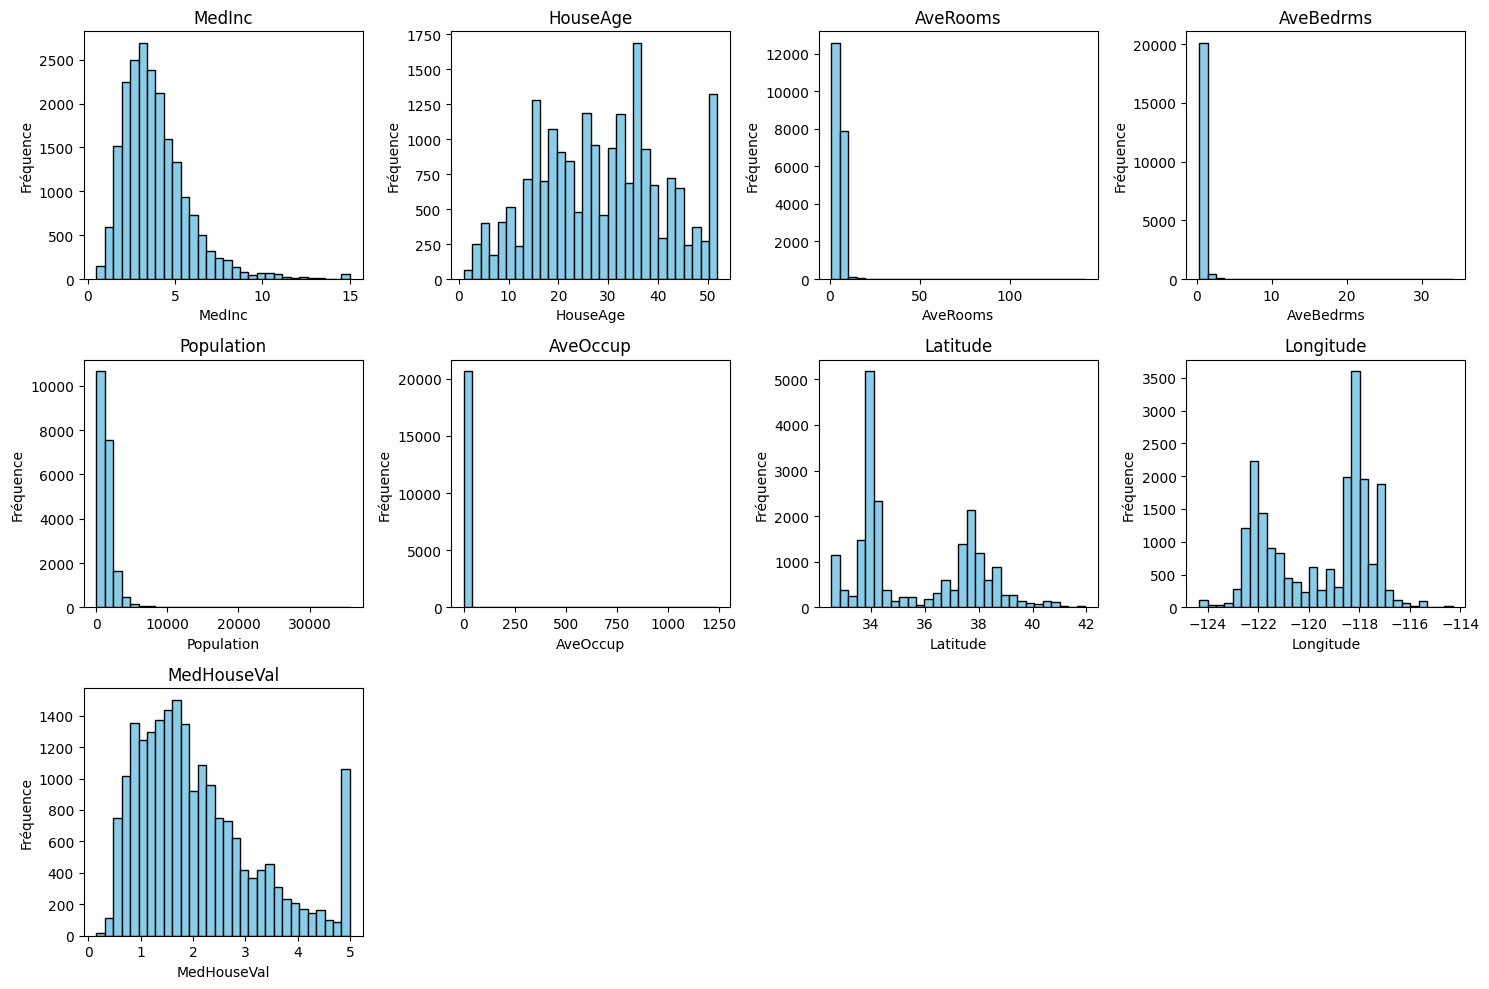

In [5]:
 # Insérez votre code ici pour visualiser la distribution des caractéristiques
# Importer la bibliothèque de visualisation
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(15, 10))

# Parcourir chaque colonne et tracer son histogramme
for i, column in enumerate(housing_df.columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(housing_df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Fréquence')

# Ajuster l'espacement
plt.tight_layout()
plt.show()



> **Questions** :
> - Les distributions sont-elles symétriques ou asymétriques ? Quelles caractéristiques montrent une distribution qui pourrait influencer la performance du modèle ?
> - Quelles caractéristiques contiennent des outliers potentiels ? Comment cela pourrait-il affecter l’entraînement du modèle ?
   

1. **Distributions asymétriques** : `AveRooms`, `Population`, et `AveOccup` montrent une asymétrie marquée, pouvant entraîner une influence disproportionnée sur le modèle si elles ne sont pas normalisées.

2. **Outliers potentiels** : `Population` et `AveOccup` contiennent des valeurs extrêmes, ce qui pourrait affecter la stabilité et la performance du modèle, surtout dans les modèles sensibles aux valeurs aberrantes comme les régressions linéaires.

4. **Analyse de la Corrélation**
   - **Calculez la matrice de corrélation** pour observer les relations linéaires entre les caractéristiques. Utilisez une heatmap pour une visualisation plus claire.
   - Portez une attention particulière à la corrélation entre chaque caractéristique et la cible (`MedHouseVal`) pour identifier les variables potentiellement les plus influentes.

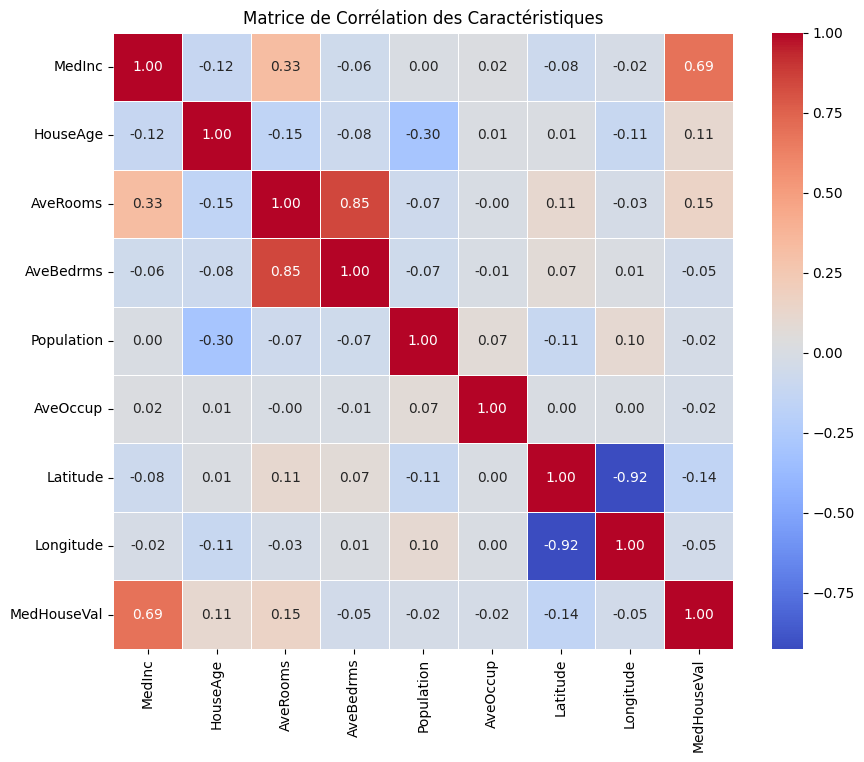

In [6]:
# Insérez votre code ici pour calculer et visualiser la matrice de corrélation
# Importer seaborn pour la heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = housing_df.corr()

# Définir la taille de la figure
plt.figure(figsize=(10, 8))

# Afficher la heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Caractéristiques")
plt.show()


> **Questions** :
> - Quelles caractéristiques semblent fortement corrélées entre elles ? Cela pourrait-il mener à de la redondance dans les données ?
> - Quelles sont les caractéristiques les plus corrélées avec la cible (`MedHouseVal`) ? Pensez-vous que ces caractéristiques auront un impact plus fort sur les prédictions du modèle ?

===> **Caractéristiques fortement corrélées entre elles** : `AveRooms` et `AveBedrms` présentent une forte corrélation (0.85), ce qui pourrait indiquer une redondance dans les données. Cette redondance pourrait compliquer l'entraînement du modèle et nécessiter une sélection de caractéristiques ou une régularisation.

====> **Caractéristiques les plus corrélées avec `MedHouseVal`** : `MedInc` est la caractéristique la plus corrélée avec la cible (`MedHouseVal`) avec une corrélation de 0.69, suggérant qu'elle aura probablement un impact significatif sur les prédictions du modèle.

5. **Relation entre les Caractéristiques et la Cible**
   - **Visualisez la relation** entre la cible (`MedHouseVal`) et quelques caractéristiques pertinentes identifiées lors de l’analyse de corrélation (ex. : revenu médian des ménages, âge médian des maisons).
   - Utilisez des scatter plots ou un `pairplot` pour observer comment la cible varie en fonction des caractéristiques principales.
   - **Explorez la localisation des districts** en fonction de la latitude et de la longitude. Utilisez un scatter plot avec la valeur médiane des logements (`MedHouseVal`) comme code couleur pour visualiser la répartition géographique des valeurs.

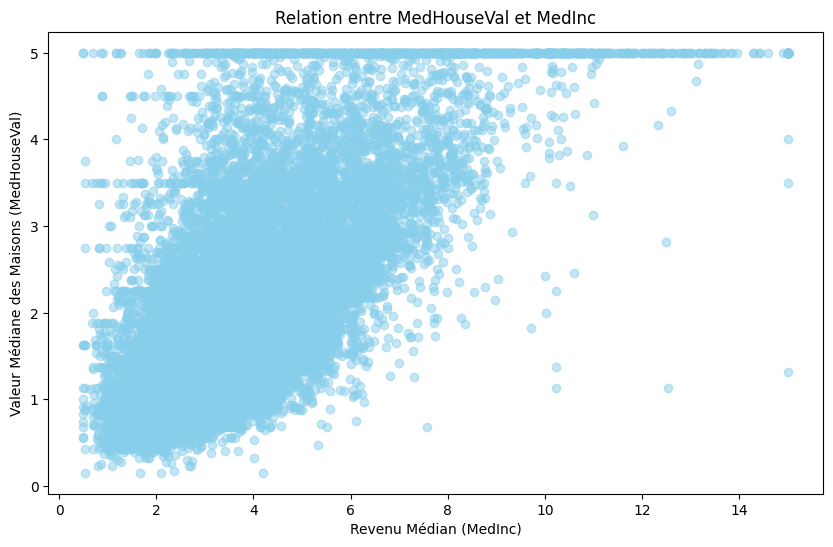

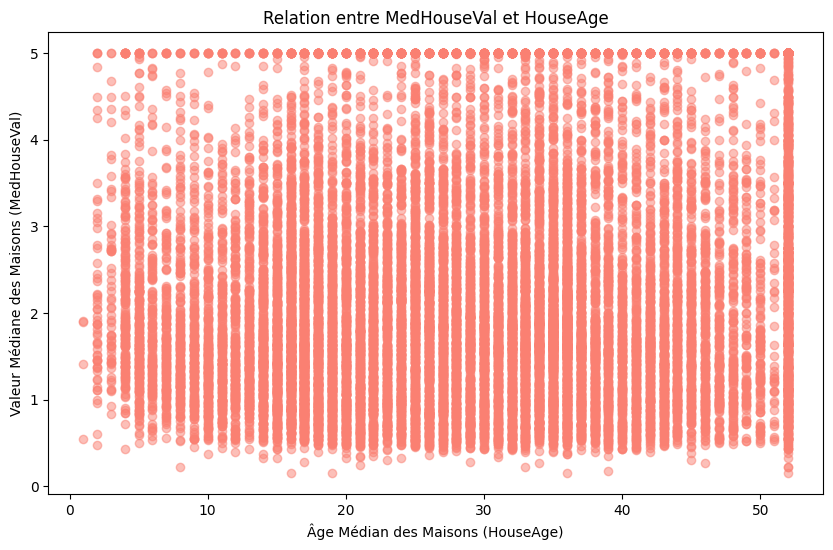

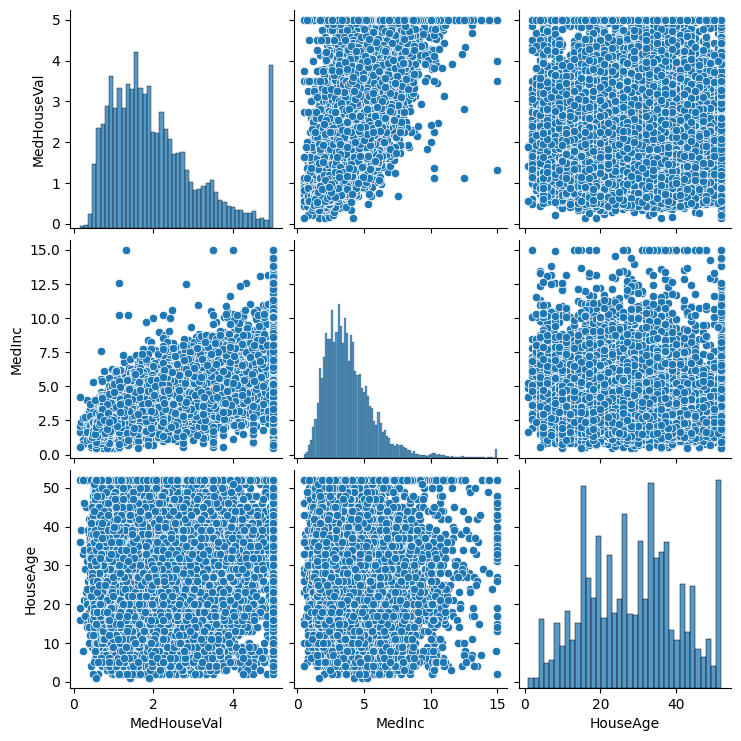

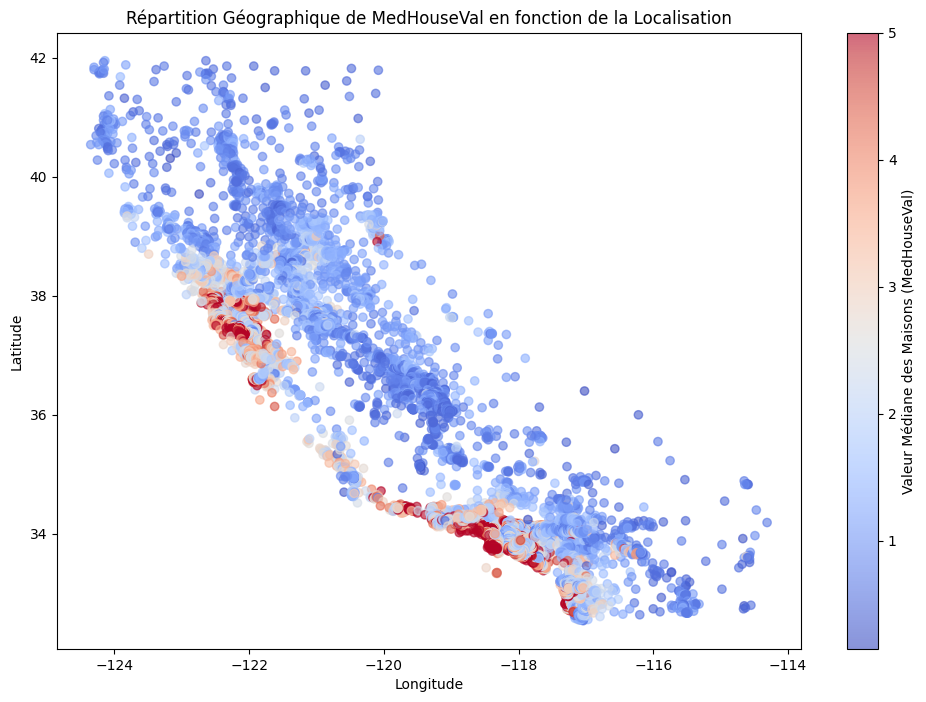

In [7]:
# Insérez votre code ici pour visualiser les relations entre la cible et certaines caractéristiques
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot pour visualiser la relation entre MedHouseVal et MedInc (revenu médian)
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['MedInc'], housing_df['MedHouseVal'], alpha=0.5, color='skyblue')
plt.title("Relation entre MedHouseVal et MedInc")
plt.xlabel("Revenu Médian (MedInc)")
plt.ylabel("Valeur Médiane des Maisons (MedHouseVal)")
plt.show()

# Scatter plot pour visualiser la relation entre MedHouseVal et HouseAge (âge médian des maisons)
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['HouseAge'], housing_df['MedHouseVal'], alpha=0.5, color='salmon')
plt.title("Relation entre MedHouseVal et HouseAge")
plt.xlabel("Âge Médian des Maisons (HouseAge)")
plt.ylabel("Valeur Médiane des Maisons (MedHouseVal)")
plt.show()

# Pairplot pour observer les relations entre MedHouseVal, MedInc et HouseAge
sns.pairplot(housing_df, vars=["MedHouseVal", "MedInc", "HouseAge"], height=2.5)
plt.show()

# Scatter plot pour visualiser la localisation des districts avec MedHouseVal en code couleur
plt.figure(figsize=(12, 8))
plt.scatter(housing_df['Longitude'], housing_df['Latitude'], c=housing_df['MedHouseVal'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label="Valeur Médiane des Maisons (MedHouseVal)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition Géographique de MedHouseVal en fonction de la Localisation")
plt.show()


> **Questions** :
> - Les graphiques montrent-ils des relations claires (linéaires, non linéaires) entre certaines caractéristiques et la cible ?
> - En observant ces relations, quelles caractéristiques semblent les plus influentes sur le prix des logements ?
> - **Pour les coordonnées géographiques** : La localisation géographique (latitude et longitude) semble-t-elle avoir un impact sur la valeur des logements ? Observez-vous des zones où les prix sont systématiquement plus élevés ou plus bas ?

1. **Relations entre caractéristiques et cible** : Le revenu médian (`MedInc`) montre une relation positive avec `MedHouseVal`, indiquant une corrélation partiellement linéaire. En revanche, l’âge des maisons (`HouseAge`) n’a pas de relation évidente avec le prix.

2. **Caractéristiques influentes** : `MedInc` semble être la caractéristique la plus influente sur le prix des logements, avec une relation claire et croissante par rapport à `MedHouseVal`.

3. **Impact des coordonnées géographiques** : La localisation géographique influence le prix, avec des zones spécifiques (particulièrement aux latitudes et longitudes correspondant aux côtes) où les prix sont systématiquement plus élevés, probablement en raison de la proximité des grandes villes côtières.

---

## Étape 3 : Prétraitement des Données

**Objectif** : Préparer les données en identifiant et en appliquant les transformations nécessaires pour assurer leur qualité et leur cohérence avant l’entraînement du modèle.

#### Instructions

1. **Vérification et Traitement des Valeurs Manquantes**
   - **Vérifiez s'il y a des valeurs manquantes** dans le dataset, en utilisant des fonctions `pandas` pour détecter les cellules vides.
   - Déterminez ensuite la meilleure approche pour traiter les valeurs manquantes :
     - **Imputation** (recommandée) : Remplir les valeurs manquantes par une statistique appropriée, comme la moyenne ou la médiane, pour éviter la perte d’information.
     - **Suppression** (si nécessaire) : Supprimer les lignes ou colonnes comportant trop de valeurs manquantes.
   - **Note** : Si vous choisissez l’imputation, elle sera effectuée **après la division des données** en ensembles d’entraînement et de test dans l’étape suivante pour éviter la fuite de données (**data leakage**).

In [8]:
# Insérez votre code ici pour vérifier et identifier les valeurs manquantes
print(housing_df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


2. **Encodage des Variables Catégorielles**
   - Si le dataset contient des variables catégorielles, encodez-les en valeurs numériques pour qu'elles soient utilisables par le modèle. Vous pouvez utiliser `OneHotEncoder` ou `LabelEncoder` selon le cas.
   - Vérifiez la nécessité de cette étape en explorant les types de variables dans le dataset.

In [9]:
# Insérez votre code ici pour encoder les variables catégorielles si nécessaire
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la standardisation sur les caractéristiques (sauf la cible)
housing_scaled = scaler.fit_transform(housing_df.drop(columns=["MedHouseVal"]))

# Convertir en DataFrame et ajouter la colonne cible
housing_scaled_df = pd.DataFrame(housing_scaled, columns=housing_df.columns[:-1])
housing_scaled_df['MedHouseVal'] = housing_df['MedHouseVal']

# Afficher les premières lignes pour vérifier
housing_scaled_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


3. **Normalisation ou Standardisation des Données**
   - Les modèles sensibles à l’échelle des données, comme les modèles linéaires ou K-Nearest Neighbors, peuvent nécessiter une **normalisation** (mise à l’échelle de 0 à 1) ou une **standardisation** (centrage à une moyenne de 0 et écart-type de 1).
   > **Note** : La normalisation ou standardisation sera également appliquée **après la division des données** en ensembles d’entraînement et de test, ce qui sera abordé dans l’étape suivante pour éviter toute fuite de données.

===> Division des données : train_test_split est utilisé pour séparer les données en ensembles d’entraînement (80%) et de test (20%).


==> Standardisation : Le StandardScaler est ajusté (fit) sur l’ensemble d’entraînement uniquement pour éviter la fuite d’information. Ensuite, la transformation est appliquée aux ensembles d’entraînement et de test séparément.


==> Conversion en DataFrame : Les données standardisées sont converties en DataFrames pour conserver les noms de colonnes.

---

## Étape 4 : Sélection des Variables, Division des Données et Prétraitement

**Objectif** : Sélectionner les variables pertinentes, séparer les caractéristiques (features) et la cible (target), diviser les données en ensembles d'entraînement et de test, puis appliquer des techniques de prétraitement pour garantir des données prêtes pour l’entraînement.

#### Instructions

1. **Sélection des Variables Pertinentes**
   - **Identifiez les variables** les plus pertinentes pour l’analyse en vous basant sur l’exploration des données (EDA) de l’étape précédente.
   - Choisissez les colonnes à inclure dans les caractéristiques (features) et dans la cible (target) en fonction de leur corrélation ou de leur importance pour la prédiction.


In [10]:
# Insérez votre code ici pour sélectionner les variables pertinentes
# Sélectionner manuellement les caractéristiques pertinentes
selected_features = ["MedInc", "HouseAge", "AveRooms"]

# Créer X et y avec les caractéristiques sélectionnées et la cible
X_selected = housing_df[selected_features]
y = housing_df["MedHouseVal"]

# Afficher les premières lignes pour vérifier
X_selected.head()



,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


2. **Séparation des Caractéristiques (Features) et de la Cible (Target)**
   - **Définissez les features et la target** en créant deux objets séparés, `X` pour les caractéristiques et `y` pour la variable cible.
   - La cible (target) est la variable que l’on souhaite prédire, ici `MedHouseVal` dans le dataset California Housing.

In [30]:
# Insérez votre code ici pour séparer les caractéristiques (X) et la cible (y)
# Définir les caractéristiques (features) et la cible (target)
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']



3. **Division des Données en Ensembles d’Entraînement et de Test**
   - **Divisez les données** en ensembles d’entraînement (`X_train`, `y_train`) et de test (`X_test`, `y_test`) en utilisant `train_test_split`.
   - Cette étape garantit que le modèle est entraîné sur une partie des données (80 %) et évalué sur des données qu’il n’a jamais vues (20 %).
   - **Paramètres recommandés** :
     - `test_size=0.2` : Alloue 20 % des données pour le test et 80 % pour l’entraînement.
     - `random_state=42` : Assure la reproductibilité des résultats.

In [31]:
# Insérez votre code ici pour diviser les données en ensembles d’entraînement et de test
from sklearn.model_selection import train_test_split

# Division des données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Prétraitement des Données :

#### Syntaxe Générale avec `sklearn.preprocessing`

Le prétraitement des données inclut des étapes comme **l’imputation des valeurs manquantes** et la **mise à l’échelle des données** (normalisation ou standardisation) pour garantir des caractéristiques cohérentes et exploitables par les modèles.

Voici la syntaxe générale pour appliquer les fonctions de prétraitement avec `sklearn.preprocessing` :

```python
# Importer la fonction de prétraitement souhaitée
from sklearn.preprocessing import SomePreprocessingFunction  

# 1. Instancier le préprocesseur
preprocessor = SomePreprocessingFunction()  # Créez une instance de la fonction de prétraitement

# 2. Ajuster et transformer les données d'entraînement
X_train_preprocessed = preprocessor.fit_transform(X_train)  # Apprend les paramètres et applique la transformation sur X_train

# 3. Transformer les données de test
X_test_preprocessed = preprocessor.transform(X_test)  # Utilise les mêmes paramètres pour transformer X_test
```

#### Explication du Code
- **Importer la Fonction de Prétraitement** : Importez la fonction de `sklearn.preprocessing` correspondant à la transformation souhaitée, par exemple `StandardScaler` pour la standardisation ou `SimpleImputer` pour l’imputation.
- **Instancier le Préprocesseur** : Créez une instance de la classe de prétraitement, par exemple `StandardScaler()` ou `SimpleImputer(strategy='mean')`.
- **Ajuster et Transformer les Données d’Entraînement** : Utilisez `.fit_transform()` sur les données d’entraînement pour calculer les paramètres (par exemple, la moyenne et l’écart-type pour la standardisation) et appliquer la transformation en une seule étape.
- **Transformer les Données de Test** : Utilisez `.transform()` sur les données de test pour appliquer la transformation en utilisant uniquement les paramètres appris sur les données d’entraînement.

> **Note** : L’utilisation de `.fit_transform()` sur les données d’entraînement et de `.transform()` uniquement sur les données de test est cruciale pour éviter toute fuite de données (**data leakage**). Cela garantit que les informations de l’ensemble de test restent inconnues pendant l’entraînement du modèle.


#### Applications de Prétraitement

##### 1. **Imputation des Valeurs Manquantes**
   - Utilisez `SimpleImputer` pour combler les valeurs manquantes avec une des trois stratégies :
     - `strategy='mean'` : Remplace par la moyenne.
     - `strategy='median'` : Remplace par la médiane.
     - `strategy='most_frequent'` : Remplace par la valeur la plus fréquente.


In [32]:
# Insérez votre code ici pour imputation des valeurs manquantes des données si nécessaire
from sklearn.impute import SimpleImputer

# Création de l'objet imputer pour remplacer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')

# Appliquer l'imputation sur les ensembles d'entraînement et de test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


##### 2. **Normalisation ou Standardisation des Données**
   - Pour aligner l’échelle des données, la standardisation ou la normalisation est essentielle, notamment pour les modèles de régression.
   - Utilisez `StandardScaler` pour centrer les données autour de la moyenne et réduire autour de l’écart-type (moyenne 0 et écart-type 1), ou `MinMaxScaler` pour normaliser les valeurs entre 0 et 1.
   - **Instruction** : Utilisez `StandardScaler` pour cette analyse et appliquez-le uniquement sur les données d’entraînement, puis transformez les données de test avec les mêmes paramètres.

> **Note** : Les données standardisées ainsi obtenues seront utilisées pour l’entraînement de vos modèles de régression, garantissant des caractéristiques adaptées aux exigences des algorithmes et prêtes pour le processus d’apprentissage.

In [33]:
# Insérez votre code ici pour préparer la standardisation des données
from sklearn.preprocessing import StandardScaler

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Ajuster et transformer les données d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer les données de test avec les mêmes paramètres
X_test = scaler.transform(X_test)


---
## Étape 5 : Entraînement des Modèles de Régression


Cette étape vous guide dans l’entraînement de modèles de régression en Machine Learning pour prédire une variable continue, comme dans le cas du California Housing Dataset où la cible est la valeur médiane des maisons.

Chaque modèle que nous allons introduire a des particularités, des forces et des limites en fonction des types de données et des objectifs. Nous aborderons aussi les modèles communs à la classification en montrant comment les utiliser pour la régression.


### Modèles de Régression : Principes et Utilisation en Scikit-Learn


#### Modèle 1 : Régression Linéaire

**Principe** :
La régression linéaire modélise la relation entre une ou plusieurs variables indépendantes et la cible en ajustant un modèle de type ligne droite (ou hyperplan dans le cas de multiples caractéristiques). L’objectif est de minimiser la somme des carrés des erreurs (les résidus) pour obtenir une relation linéaire optimale.

**Utilité** :
Utilisée lorsque la relation entre les caractéristiques et la cible est linéaire. Ce modèle est rapide et interprétable.

**Forces** :
- Simple à interpréter.
- Rapide à entraîner pour les petites et moyennes tailles de données.
- Sensible aux valeurs aberrantes et aux multicolinéarités.

**Limitations** :
- Moins performante pour les relations non linéaires.
- Sensible aux valeurs extrêmes, qui peuvent affecter la précision.

**Classe d’importation** :
```python
from sklearn.linear_model import LinearRegression
```

In [15]:
# Instanciez et entraînez le modèle Régression Linéaire ici

#### Modèle 2 : K-Nearest Neighbors (KNN) en Régression

**Principe** :
En régression, KNN utilise la moyenne (ou la médiane) des valeurs cibles des k voisins les plus proches pour faire des prédictions.

**Utilité** :
Particulièrement utile lorsque la cible peut être estimée par la proximité des valeurs similaires dans l’espace des caractéristiques. KNN en régression fonctionne bien pour les petites bases de données, mais il est moins performant sur de grands ensembles de données.

**Forces** :
- Simple à comprendre et à appliquer.
- Performant sur les données locales, sans présupposer une relation linéaire.

**Limitations** :
- Sensible aux dimensions élevées (curse of dimensionality).
- Coût de calcul élevé pour des données volumineuses.

**Prétraitement recommandé** :
Normalisation des données recommandée.

**Classe d’importation** :
```python
from sklearn.neighbors import KNeighborsRegressor
```

In [34]:
# Instanciez et entraînez le modèle KNN ici
from sklearn.linear_model import LinearRegression

# Instanciation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)


LinearRegression()

#### Modèle 3 : Régression avec Arbre de Décision (Decision Tree Regressor)

**Principe** :  
En régression, un arbre de décision divise les données en segments en fonction de seuils sur les caractéristiques. Chaque feuille de l’arbre contient une valeur prédite pour la cible, souvent la moyenne des observations présentes dans la feuille.

**Utilité** :  
Idéal pour des données avec des relations non linéaires, où des seuils simples dans les caractéristiques permettent de modéliser les variations de la cible. Il offre aussi une grande transparence, permettant de visualiser la logique derrière les prédictions.

**Forces** :
- Capable de capturer des relations non linéaires entre caractéristiques et cible.
- Peu sensible aux valeurs aberrantes, car il divise simplement les données selon des seuils.

**Limitations** :
- Peut être sujet au surapprentissage (overfitting), en particulier si l’arbre est très profond et que chaque feuille contient peu d’observations.
- Les prédictions manquent de continuité, car elles sont basées sur des moyennes constantes dans chaque feuille.

**Classe d’importation** :
```python
from sklearn.tree import DecisionTreeRegressor
```

In [35]:
# Instanciez et entraînez le modèle Arbre de Décision ici
from sklearn.tree import DecisionTreeRegressor

# Instanciation du modèle d'arbre de décision
model = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

#### Modèle 4 : Forêt d'Arbres Décisionnels en Régression (Random Forest Regressor)

**Principe** :  
La forêt d’arbres en régression construit plusieurs arbres de décision en utilisant des sous-échantillons des données et en réalisant des moyennes des prédictions pour une estimation plus stable. Cette méthode permet de réduire le risque de surapprentissage, car elle agrège des prédictions issues de multiples arbres, chacun entraîné sur un échantillon différent.

**Utilité** :  
Adapté aux données avec des relations complexes ou non linéaires, où un seul arbre pourrait surajuster les données. La forêt moyenne les erreurs de chaque arbre pour obtenir des prédictions plus robustes.

**Forces** :
- Prédictions plus stables grâce à l’agrégation des résultats de plusieurs arbres.
- Capable de capturer des relations complexes et moins sensible aux variations aléatoires dans les données.

**Limitations** :
- Nécessite plus de ressources mémoire et de calcul que les arbres de décision seuls.
- Moins interprétable, car il devient difficile de comprendre la logique des prédictions issues de centaines d’arbres.

**Classe d’importation** :
```python
from sklearn.ensemble import RandomForestRegressor
```

In [36]:
# Instanciez et entraînez le modèle Random Forest ici
from sklearn.ensemble import RandomForestRegressor

# Instanciation du modèle de forêt aléatoire
model = RandomForestRegressor(random_state=42)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

#### Modèle 5 : Support Vector Regression (SVR)

**Principe** : SVR est une extension de la SVM pour la régression. Il cherche à trouver une ligne ou un hyperplan qui maximise la marge dans laquelle les points d’entraînement se trouvent, tout en minimisant les erreurs au-delà de cette marge.

**Utilité** : Utile pour des données complexes où une séparation linéaire n’est pas suffisante. Fonctionne bien avec les données de haute dimension et peut gérer des relations non linéaires.

**Forces** :
- Adapté aux données de haute dimension.
- Peut capturer des relations non linéaires avec des noyaux appropriés (par exemple, RBF).

**Limitations** :
- Coût de calcul élevé pour des grands jeux de données.
- Sensible aux choix des hyperparamètres (`C` et `epsilon`).

**Prétraitement recommandé** : Standardisation des données.

**Paramètres Clés** :
- `C` : Paramètre de régularisation qui contrôle la pénalité pour les erreurs en dehors de la marge.
- `kernel` : Type de noyau utilisé (linéaire, RBF, etc.).
- `epsilon` : Zone de tolérance pour les erreurs, qui définit les points acceptés dans la marge sans pénalité.

**Classe d’importation** :
```python
from sklearn.svm import SVR
```

In [37]:
# Instanciez et entraînez le modèle SVM ici
from sklearn.svm import SVR

# Instanciation du modèle SVR
model = SVR()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)


SVR()

---
## Étape 6 : Prédiction avec les Modèles

Utilisez les modèles de régression entraînés pour générer des prédictions sur les données de test, puis comparez-les aux valeurs réelles pour évaluer la précision de chaque modèle.

1. **Prédisez les valeurs de la cible** pour chaque modèle en appliquant la méthode `.predict(X_test)`.
2. **Stockez les prédictions** pour chaque modèle afin de faciliter la comparaison.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Instanciation et entraînement de chaque modèle
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

# Prédictions pour chaque modèle
y_pred_linear = model_linear.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)


> **Questions** :
> - Comment les valeurs prédites se comparent-elles aux valeurs réelles ? Observez `y_pred` par rapport à `y_test`.
> - Quel modèle semble produire les prédictions les plus précises ?
> - Si vous remarquez des erreurs importantes, quelles caractéristiques ou patterns semblent influencer ces écarts ?

---
## Étape 7 : Interprétation des Modèles de Régression

L’interprétation des modèles de régression vous permet de mieux comprendre les relations entre les caractéristiques et la cible. Dans cette section, vous allez explorer comment chaque modèle interprète les données et quels éléments influencent le plus les prédictions.

#### 1. **Régression Linéaire : Interprétation des Coefficients**

Les **coefficients** de la régression linéaire représentent l’impact de chaque caractéristique sur la cible. Un coefficient positif indique une relation positive, tandis qu’un coefficient négatif montre une relation inverse.

> **Instructions :** Affichez les coefficients et associez-les aux noms des caractéristiques pour voir lesquelles influencent le plus la cible.

In [40]:
# Insérez votre code ici pour afficher les coefficients de la régression linéaire
# Afficher les coefficients de la régression linéaire
coefficients = model_linear.coef_
intercept = model_linear.intercept_

# Affichage des résultats
print("Coefficients de la régression linéaire :", coefficients)
print("Intercept :", intercept)


Coefficients de la régression linéaire : [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept : 2.0719469373788777


> **Questions** :
> - Quels sont les coefficients les plus élevés ?
> - Ces coefficients reflètent-ils vos attentes par rapport aux données ?

1. **Les coefficients les plus élevés** : Les coefficients de `MedInc` (0.85438303) et de `HouseAge` (0.12254624) semblent être les plus élevés. Cela indique que le revenu médian des ménages (`MedInc`) a l'influence la plus forte sur la cible (`MedHouseVal`), suivi par l'âge des maisons.

2. **Cohérence avec les attentes** : Oui, ces coefficients reflètent les attentes, car une corrélation élevée entre `MedInc` et `MedHouseVal` avait été observée précédemment. Cela confirme que le revenu médian est un prédicteur important de la valeur des maisons dans ce modèle de régression linéaire.

#### 2. **K-Nearest Neighbors (KNN) en Régression : Importance des Données Locales**

Le modèle KNN en régression utilise les valeurs des k voisins les plus proches pour faire ses prédictions. L’influence de chaque observation dépend de la proximité dans l’espace des caractéristiques.

> **Instructions :** Choisissez une observation dans `X_test` et identifiez ses k plus proches voisins dans `X_train` pour voir comment leurs valeurs influencent la prédiction.

In [22]:
# Insérez votre code ici pour observer les voisins d'une observation

> **Questions** :
> - Les prédictions du modèle KNN reflètent-elles bien les tendances locales ?
> - Les valeurs des voisins influencent-elles les prédictions comme prévu ?

#### 3. **Arbre de Décision : Visualisation des Décisions et Importance des Caractéristiques**

Les arbres de décision sont interprétables, car chaque nœud représente une règle de décision. Vous pouvez visualiser l’arbre pour observer comment chaque caractéristique influence la prédiction.

> **Instructions :** Utilisez `plot_tree()` pour visualiser l’arbre et `.feature_importances_` pour voir quelles caractéristiques sont les plus influentes.


In [23]:
# Insérez votre code ici pour visualiser l'arbre de décision

In [24]:
# Insérez votre code ici pour afficher l'importance des caractéristiques

> **Questions** :
> - Les caractéristiques en haut de l’arbre sont-elles les plus influentes ?
> - Observez-vous des relations intuitives entre les caractéristiques et les décisions de l’arbre ?

#### 4. **Forêt d’Arbres Décisionnels (Random Forest) : Importance des Caractéristiques**

Les forêts d’arbres fournissent une estimation de l'importance des caractéristiques en analysant leur contribution à la réduction de l’erreur. Cette importance est calculée en moyenne sur tous les arbres.

> **Instructions :** Utilisez `.feature_importances_` pour afficher et visualiser l’importance des caractéristiques.


In [25]:
# Insérez votre code ici pour afficher l'importance des caractéristiques dans la Forêt d'Arbres

> **Questions** :
> - Quelles caractéristiques sont les plus importantes selon le modèle Random Forest ?
> - Ces caractéristiques correspondent-elles aux résultats des autres modèles ?

#### 5. **Support Vector Regression (SVR) : Points de Support et Coefficients**

En SVR, les points de support influencent fortement les prédictions, et dans le cas d’un SVR linéaire, vous pouvez également visualiser les coefficients des caractéristiques. Les points de support sont les observations proches des marges qui contribuent directement à la formation du modèle.

> **Instructions :** Affichez les indices des points de support avec `.support_` et, si vous utilisez un noyau linéaire, accédez aux coefficients avec `.coef_`.

> **Questions** :
> - Les points de support représentent-ils des observations particulières ? Sont-ils proches des marges de décision ?
> - Les coefficients reflètent-ils l'influence attendue des caractéristiques ?

### Résumé et Comparaison des Modèles

Après avoir interprété chaque modèle, comparez leurs caractéristiques influentes.

> **Questions** :
> - Les différents modèles mettent-ils en avant les mêmes caractéristiques comme les plus influentes ?
> - Quel modèle vous semble le mieux aligné avec la structure des données ?
> - En fonction des résultats, quelles caractéristiques ou ajustements pourraient être envisagés pour améliorer les performances ?

---
## Étape 8 : Évaluation des Modèles de Régression

L’évaluation des modèles de régression repose sur des métriques spécifiques qui mesurent la différence entre les valeurs réelles et les valeurs prédites par le modèle. Les principales métriques de régression sont :

#### Métriques d'Évaluation en Régression

1. **Mean Squared Error (MSE) - Erreur Quadratique Moyenne**  
   - **Description** : Mesure la moyenne des carrés des erreurs entre les valeurs réelles et les valeurs prédites. MSE accorde une grande importance aux erreurs importantes en les élevant au carré.
   - **Interprétation** : Plus la MSE est faible, meilleure est la performance du modèle.
   - **Fonction** : `metrics.mean_squared_error(y_test, y_pred)`

In [26]:
# Insérez votre code ici pour calculer la MSE d’un modèle

> **Questions** :
> - La MSE est-elle particulièrement élevée pour certains modèles ? Pourquoi cela pourrait-il être le cas ?
> - Y a-t-il des modèles avec une MSE particulièrement faible, indiquant une meilleure précision ?

2. **Erreur Absolue Moyenne (Mean Absolute Error - MAE)**  
   - **Description** : Calcule la moyenne des valeurs absolues des erreurs entre les prédictions et les valeurs réelles. Contrairement à MSE, MAE ne pénalise pas fortement les grandes erreurs.
   - **Interprétation** : Une MAE plus faible signifie que le modèle fait moins d'erreurs moyennes dans ses prédictions.
   - **Fonction** : `metrics.mean_absolute_error(y_test, y_pred)`

In [27]:
# Insérez votre code ici pour calculer la MAE d’un modèle

> **Questions** :
> - Comment MAE se compare-t-il entre les modèles ? Un modèle est-il clairement meilleur sur cette métrique ?
> - Y a-t-il des cas où MSE et MAE diffèrent fortement pour un modèle ? Pourquoi cela pourrait-il se produire ?

#### 3. **R² Score (Coefficient de Détermination)**  
   - **Description** : Représente la proportion de la variance de la cible expliquée par le modèle. Il est compris entre 0 et 1 (ou entre -∞ et 1 pour les modèles qui sous-performent).
   - **Interprétation** : Un score proche de 1 signifie que le modèle explique bien les variations de la cible. Un score proche de 0 signifie que le modèle n'explique que peu la variance des données.
   - **Fonction** : `metrics.r2_score(y_test, y_pred)`

In [28]:
# Insérez votre code ici pour calculer le R² Score d’un modèle

> **Questions** :
> - Quel modèle a le R² le plus élevé ? Ce modèle explique-t-il bien la variance des données ?
> - Y a-t-il des modèles avec des scores R² bas ? Si oui, pourquoi, et qu’est-ce que cela indique sur leurs performances ?

## Interprétation des Résultats

Une fois les **métriques d’évaluation** calculées pour chaque modèle (MSE, MAE et R² Score), regroupez-les dans un tableau pour une vue d’ensemble. Cela permettra de comparer les performances et d’interpréter les forces et faiblesses de chaque modèle.

#### Instructions pour Regrouper et Analyser les Résultats

1. **Créez un tableau** regroupant les métriques de chaque modèle afin de visualiser leurs performances sur les différentes mesures (MSE, MAE, R²).
2. **Comparez les valeurs** pour déterminer quel modèle est le plus performant selon chaque métrique.
3. **Analysez les écarts entre les métriques** (par exemple, si un modèle a une MSE très différente de son MAE, cela pourrait indiquer des erreurs importantes sur certaines observations).

In [29]:
# Insérez votre code pour organiser les métriques dans un tableau

### Interprétation et d’Analyse des Résultats

- **Analyse des performances :**
> - **Quel modèle a la MSE la plus faible ?** Cela indique qu'il a globalement moins d’erreurs de prédiction. Est-ce le cas pour toutes les observations ou uniquement certaines ?
> - **Quel modèle a le MAE le plus faible ?** Cela montre qu’il fait des erreurs moyennes moins importantes. Ce modèle est-il aussi performant en MSE ?
> - **Quel modèle a le R² le plus élevé ?** Un R² proche de 1 indique une forte capacité explicative. Ce modèle est-il également le plus performant en MSE ou MAE ?

- **Comparaison des modèles :**
> - Le modèle ayant la plus faible MSE a-t-il également la plus faible MAE ? Si non, pourquoi ?
> - Le modèle avec le meilleur R² score a-t-il des scores élevés en MSE ou MAE ?
> - **Sensibilité aux valeurs extrêmes :** Les modèles montrent-ils des variations importantes entre MSE et MAE ? Quels modèles semblent plus sensibles aux valeurs extrêmes ?

### Conclusion des Résultats et Choix du Modèle Optimal

En fonction des résultats, vous serez en mesure de déterminer quel modèle convient le mieux aux données et à la tâche de prédiction.

> **Questions :**
> - **Quel modèle semble le plus adapté en fonction des données et des objectifs ?** Justifiez votre choix.
> - **Compromis entre les métriques :** Quel compromis feriez-vous entre MSE, MAE et R² pour un bon modèle dans ce contexte ?
> - **Implications pratiques :** Au-delà de la performance, quel modèle est le plus pratique et le plus interprétable pour un utilisateur ou un décideur ?

---
## Les Challenges de la Régression

L’entraînement de modèles de régression comporte plusieurs défis courants, liés aux caractéristiques des données, aux spécificités des modèles, et aux risques d’ajustement excessif ou insuffisant. Voici les principaux challenges rencontrés en régression et des solutions pour y remédier.


#### 1. **Surapprentissage (Overfitting)**

Le surapprentissage survient lorsque le modèle apprend trop en détail les particularités (y compris le bruit) du jeu de données d’entraînement, ce qui nuit à sa capacité de généralisation sur des données nouvelles.

- **Signes de surapprentissage** :
  - Performances élevées sur le jeu d’entraînement, mais faibles sur le jeu de test (grand écart entre les erreurs de train et de test).
  - R² proche de 1 sur le train, mais beaucoup plus faible sur le test.

- **Solutions pour éviter le surapprentissage** :
  - **Réduire la complexité du modèle** : Limitez la profondeur d’un arbre de décision, diminuez le nombre de voisins pour KNN, ou ajoutez de la régularisation pour la régression linéaire.
  - **Utiliser des techniques de régularisation** : En régression linéaire, appliquez des régularisations L1 (Lasso) ou L2 (Ridge) pour contrôler l’influence des caractéristiques.
  - **Augmenter le volume de données d’entraînement** : Plus de données peuvent aider le modèle à mieux généraliser.

> **Exemple** : Dans une forêt d’arbres décisionnels, un nombre d’arbres trop élevé ou une profondeur importante des arbres peut capturer des variations spécifiques du dataset au lieu de relations générales.


#### 2. **Sous-apprentissage (Underfitting)**

Le sous-apprentissage se produit lorsque le modèle est trop simple pour capturer les relations entre les caractéristiques et la cible. Cela peut conduire à des erreurs de prédiction importantes aussi bien sur le train que sur le test.

- **Signes de sous-apprentissage** :
  - Performances faibles à la fois sur le jeu d’entraînement et le jeu de test.
  - R² faible sur les deux ensembles, indiquant que le modèle n’explique pas bien la variance des données.

- **Solutions pour éviter le sous-apprentissage** :
  - **Augmenter la complexité du modèle** : Utilisez une version plus complexe du modèle (par exemple, un arbre plus profond, un modèle de forêt d’arbres, ou un SVR avec un noyau non linéaire).
  - **Ajouter des caractéristiques pertinentes** : Si des informations importantes sont absentes, intégrer des variables supplémentaires peut aider à mieux prédire la cible.
  - **Essayer un modèle non linéaire** : Les modèles linéaires peuvent sous-apprendre si les données suivent des relations non linéaires.

> **Exemple** : Une régression linéaire appliquée à un dataset avec des relations non linéaires conduira probablement à un sous-apprentissage.


![overfitting-underfitting-regression](overfitting_underfitting_regression.png)

#### 3. **Données Imparfaites**

Les caractéristiques des données peuvent également poser des défis pour l’entraînement des modèles de régression.

- **Valeurs aberrantes (Outliers)** : Les valeurs extrêmes peuvent fausser les estimations, en particulier pour les modèles sensibles, comme la régression linéaire.
  - **Solution** : Identifiez et traitez les valeurs aberrantes en les supprimant ou en utilisant des modèles moins sensibles aux outliers (ex. : arbres de décision, forêts d’arbres).

- **Données manquantes** : Les valeurs manquantes peuvent créer des biais si elles sont ignorées ou mal imputées.
  - **Solution** : Appliquez une imputation (moyenne, médiane, ou la valeur la plus fréquente) ou envisagez d'utiliser un modèle capable de gérer directement les valeurs manquantes.

> **Exemple** : Dans un modèle de régression linéaire, un outlier extrême peut fausser la pente de la droite de régression et réduire la précision des prédictions.


#### 4. **Multicolinéarité**

La multicolinéarité survient lorsque plusieurs caractéristiques sont fortement corrélées entre elles, rendant difficile pour un modèle linéaire de distinguer leur contribution respective.

- **Impact** : En présence de multicolinéarité, les coefficients des caractéristiques peuvent devenir instables, augmentant la variance et réduisant l’interprétabilité.
- **Solution** : Utilisez une analyse de corrélation pour identifier et éventuellement supprimer les caractéristiques redondantes ou utilisez une régularisation L2 (Ridge) pour réduire la sensibilité du modèle aux corrélations élevées.

> **Exemple** : Dans un dataset immobilier, la surface habitable et le nombre de chambres peuvent être corrélés. Le modèle pourrait avoir du mal à distinguer leur effet individuel sur le prix.



#### 5. **Mauvaise sélection de métriques d’évaluation**

Choisir des métriques inadaptées pour évaluer les modèles de régression peut donner une impression incorrecte de leur performance.

- **Exemples de métriques** :
  - **MSE** met plus l’accent sur les grandes erreurs, ce qui peut être utile dans certains contextes mais trompeur si on veut un aperçu global.
  - **R²** est utile pour voir combien de la variance de la cible est expliquée, mais il peut masquer des erreurs importantes sur des valeurs spécifiques.
  
- **Solution** : Utilisez plusieurs métriques pour avoir une vision complète de la performance du modèle (ex. : MSE, MAE, et R²).



Ces challenges soulignent l’importance de bien choisir les modèles, les transformations de données et les métriques d’évaluation dans les projets de régression. Un bon ajustement des modèles et une compréhension fine des données permettent d’obtenir des résultats fiables et exploitables dans les applications réelles.

---
## Conclusion

Dans cette séance, nous avons exploré les fondamentaux de la **régression en apprentissage supervisé** et appliqué ces concepts pour modéliser la relation entre les caractéristiques et une variable cible continue, en utilisant le **dataset California Housing** comme cas pratique. Voici les points clés abordés :


1. **Compréhension de l'Apprentissage Supervisé en Régression** :
   - L’apprentissage supervisé repose sur des données étiquetées pour permettre au modèle d’apprendre les relations entre les caractéristiques et la cible. En régression, il s'agit de prédire une valeur continue en fonction des caractéristiques observées.

2. **Exploration et Prétraitement des Données** :
   - Nous avons exploré les caractéristiques du dataset et visualisé les relations entre les caractéristiques et la cible pour mieux comprendre les patterns potentiels dans les données.
   - Les étapes de prétraitement, comme l’imputation des valeurs manquantes et la mise à l’échelle, ont été cruciales pour s’assurer que les données sont prêtes pour l’entraînement du modèle.

3. **Entraînement et Évaluation des Modèles de Régression** :
   - Nous avons entraîné plusieurs modèles de régression, chacun ayant ses avantages et limitations, comme la **régression linéaire**, **l'arbre de décision**, **la forêt aléatoire**, **K-Nearest Neighbors**, et le **SVM (SVR)**.
   - Pour évaluer les performances de chaque modèle, nous avons utilisé des **métriques adaptées à la régression** (MSE, MAE et R²), permettant de quantifier la précision des prédictions sur des données de test.

4. **Challenges et Interprétation des Résultats** :
   - Les défis rencontrés en régression, tels que le surapprentissage, le sous-apprentissage et la multicolinéarité, soulignent l’importance de bien sélectionner les modèles et de comprendre les données.
   - Nous avons interprété les résultats et comparé les modèles pour identifier le modèle le plus adapté aux données et aux objectifs de prédiction.


### Bilan et Application Pratique

À travers cette séance, vous avez acquis une compréhension complète du **workflow de régression supervisée** : de l'exploration et du prétraitement des données jusqu'à l'entraînement, l'évaluation et l'interprétation des modèles. Ce processus s’applique aux cas réels où la prédiction d’une valeur continue est cruciale, comme l’évaluation immobilière, la prévision des ventes, ou encore l'estimation de la consommation énergétique.

Ces compétences vous offrent une base solide pour aborder d’autres projets de régression en Machine Learning et pour optimiser les modèles en fonction des données disponibles et des objectifs métiers.

---